## Pseudo code

1. Create 81 lists, each with 9 elements
2. Perform hard assign. Overwrite the values of the lists based on initial values provided by Sudoku question
3. Update elements of the list which are not assigned, based on constraints
4. Select one list, whose length is greater than 1
5. Perform a soft assign. Assign the least value of elements in the list, to the list
6. Run step 3
7. If any error, drop the assigned value from the list
    7.1 if the length of the list is 1, then check for soft assignments run step 4 and beyond
    7.2 if length of the list is greater than 1, then step 5 and beyond
8. If no error, then select another list whose length is greater than 1
9. Run step 5 and beyond

### Constraints

a list cannot have elements which are present in any other single length list (SLL), given the SLL appears within the same block or horizontal row or vertical row

## Step 1: Create variables

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
sudoku_array = [[1, 2, 3, 4, 5, 6, 7, 8, 9]]
for i in range(80):
    sudoku_array.append([1, 2, 3, 4, 5, 6, 7, 8, 9])

## Step 2: Assignment

### Difficulty level: Easy

In [4]:
# sudoku_array[1] = [3]
# sudoku_array[2] = [8]
# sudoku_array[6] = [2]
# sudoku_array[7] = [5]
# sudoku_array[8] = [4]
# sudoku_array[11] = [1]
# sudoku_array[14] = [2]
# sudoku_array[15] = [6]
# sudoku_array[17] = [7]
# sudoku_array[19] = [7]
# sudoku_array[22] = [6]
# sudoku_array[24] = [9]
# sudoku_array[26] = [3]
# sudoku_array[27] = [7]
# sudoku_array[31] = [1]
# sudoku_array[34] = [3]
# sudoku_array[36] = [5]
# sudoku_array[41] = [4]
# sudoku_array[42] = [1]
# sudoku_array[44] = [2]
# sudoku_array[45] = [1]
# sudoku_array[46] = [2]
# sudoku_array[47] = [3]
# sudoku_array[48] = [6]
# sudoku_array[54] = [8]
# sudoku_array[55] = [1]
# sudoku_array[56] = [7]
# sudoku_array[58] = [2]
# sudoku_array[59] = [6]
# sudoku_array[63] = [3]
# sudoku_array[64] = [9]
# sudoku_array[65] = [4]
# sudoku_array[66] = [8]
# sudoku_array[69] = [7]
# sudoku_array[71] = [6]
# sudoku_array[72] = [2]
# sudoku_array[74] = [5]
# sudoku_array[75] = [4]

#### difficulty level: Medium

In [5]:
sudoku_array[1] = [7]
sudoku_array[2] = [2]
sudoku_array[3] = [5]
sudoku_array[8] = [4]
sudoku_array[12] = [8]
sudoku_array[15] = [6]
sudoku_array[18] = [8]
sudoku_array[19] = [3]
sudoku_array[24] = [2]
sudoku_array[25] = [5]
sudoku_array[27] = [1]
sudoku_array[31] = [9]
sudoku_array[32] = [6]
sudoku_array[33] = [8]
sudoku_array[37] = [8]
sudoku_array[38] = [4]
sudoku_array[43] = [9]
sudoku_array[44] = [6]
sudoku_array[47] = [6]
sudoku_array[49] = [1]
sudoku_array[50] = [8]
sudoku_array[51] = [7]
sudoku_array[52] = [4]
sudoku_array[54] = [4]
sudoku_array[57] = [9]
sudoku_array[65] = [3]
sudoku_array[68] = [5]
sudoku_array[73] = [2]
sudoku_array[75] = [3]
sudoku_array[76] = [7]

Below is a snapshot of the sudoku problem

https://sudoku.com

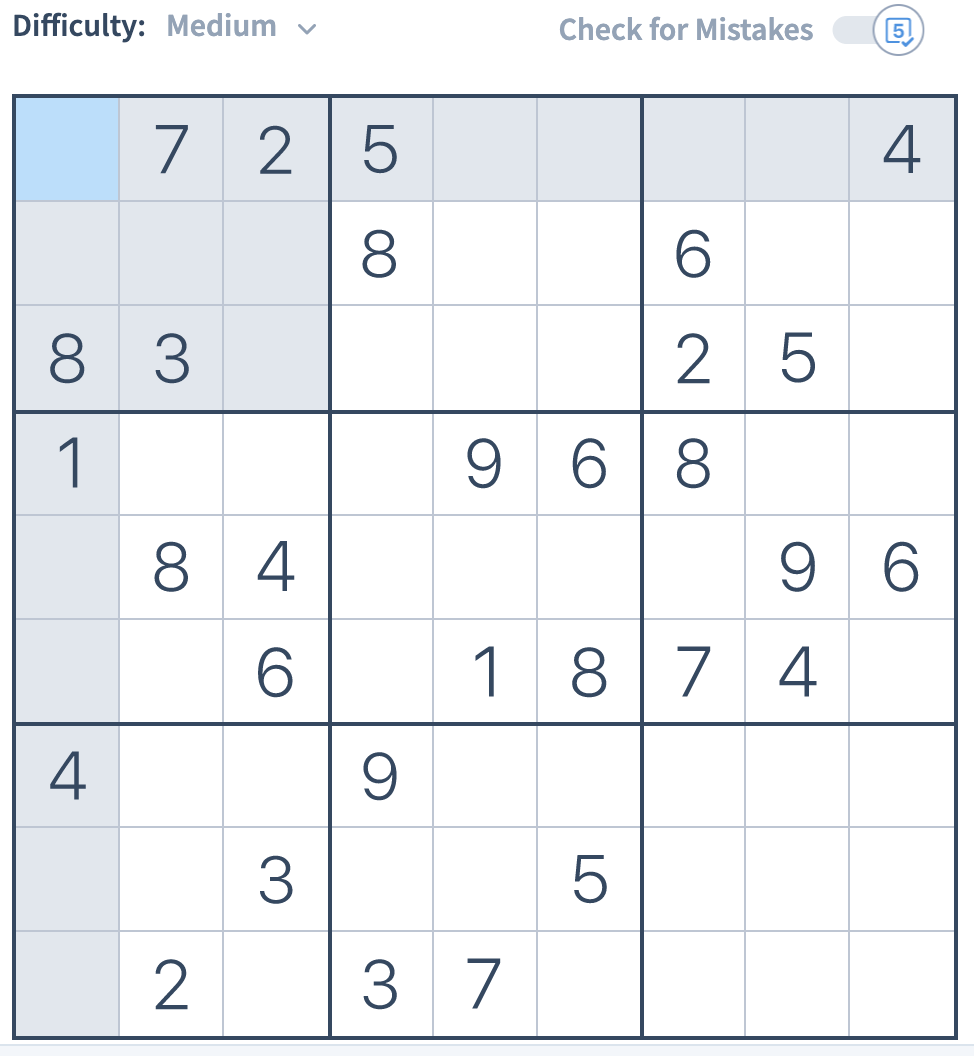

## Step 3: Update table

In [6]:
def row_excl_update():
    global row_excl
    row_excl = [[0],[0],[0],[0],[0],[0],[0],[0],[0]]
    for i in range(0,80,9):
        k = i//9
        for j in range(i, i+9):
            if len(sudoku_array[j]) == 1:
                row_excl[k] = row_excl[k] + sudoku_array[j]
    return(row_excl)

In [7]:
row_excl_update()

[[0, 7, 2, 5, 4],
 [0, 8, 6],
 [0, 8, 3, 2, 5],
 [0, 1, 9, 6, 8],
 [0, 8, 4, 9, 6],
 [0, 6, 1, 8, 7, 4],
 [0, 4, 9],
 [0, 3, 5],
 [0, 2, 3, 7]]

In [8]:
def row_condn(i):
    sudoku_array[i] = [x for x in sudoku_array[i] if x not in row_excl[i//9]]

In [9]:
def col_excl_update():
    global col_excl
    col_excl = [[0],[0],[0],[0],[0],[0],[0],[0],[0]]
    for i in range(9):
        k = i
        for j in range(i, 80, 9):
            if len(sudoku_array[j]) == 1:
                col_excl[k] = col_excl[k] + sudoku_array[j]
    return(col_excl)

In [10]:
col_excl_update()

[[0, 8, 1, 4],
 [0, 7, 3, 8, 2],
 [0, 2, 4, 6, 3],
 [0, 5, 8, 9, 3],
 [0, 9, 1, 7],
 [0, 6, 8, 5],
 [0, 6, 2, 8, 7],
 [0, 5, 9, 4],
 [0, 4, 6]]

In [11]:
def col_condn(i):
    sudoku_array[i] = [x for x in sudoku_array[i] if x not in col_excl[i%9]]

In [12]:
def box_excl_update():
    global box_excl
    box_excl = [[0],[0],[0],[0],[0],[0],[0],[0],[0]]
    for i in range(81):
        k = ((i//3)//9)*3 + ((i//3)%3)
        if len(sudoku_array[i]) == 1:
            box_excl[k] = box_excl[k] + sudoku_array[i]
    return(box_excl)

In [13]:
box_excl_update()

[[0, 7, 2, 8, 3],
 [0, 5, 8],
 [0, 4, 6, 2, 5],
 [0, 1, 8, 4, 6],
 [0, 9, 6, 1, 8],
 [0, 8, 9, 6, 7, 4],
 [0, 4, 3, 2],
 [0, 9, 5, 3, 7],
 [0]]

In [14]:
box_excl

[[0, 7, 2, 8, 3],
 [0, 5, 8],
 [0, 4, 6, 2, 5],
 [0, 1, 8, 4, 6],
 [0, 9, 6, 1, 8],
 [0, 8, 9, 6, 7, 4],
 [0, 4, 3, 2],
 [0, 9, 5, 3, 7],
 [0]]

In [15]:
def box_condn(i):
    sudoku_array[i] = [x for x in sudoku_array[i] if x not in box_excl[((i//3)//9)*3 + ((i//3)%3)]]

In [16]:
def issue_check():
    global error_flag_duplicate_list
    global error_flag_zero_list
    error_flag_duplicate_list = 0
    error_flag_zero_list = 0
    
    for i in range(9):
        if len([x for x in box_excl[i] if box_excl[i].count(x) > 1]) > 0: error_flag_duplicate_list+=1
    
    for i in range(81):
        if len(sudoku_array[i]) < 1: error_flag_zero_list+=1
    
    if error_flag_duplicate_list > 0:
        print("duplicate list error")
        return('error')

    if error_flag_zero_list > 0:
        print("zero list error")
        return('error')

In [17]:
#issue_check()

In [18]:
def filled_cnt():
    global filled_cnt_val
    filled_cnt_val = 0
    for i in range(81):
        if len(sudoku_array[i]) == 1:
            filled_cnt_val+=1
    return(filled_cnt_val)

In [19]:
def print_sudoku():
    sudoku_pd = pd.DataFrame(columns = ('a','b','c','d','e','f','g','h','i')) 
    
    for i in range(9):
        sudoku_pd = sudoku_pd.append({"a":sudoku_array[(i*9)+0],
                                      "b":sudoku_array[(i*9)+1],
                                      "c":sudoku_array[(i*9)+2],
                                      "d":sudoku_array[(i*9)+3],
                                      "e":sudoku_array[(i*9)+4],
                                      "f":sudoku_array[(i*9)+5],
                                      "g":sudoku_array[(i*9)+6],
                                      "h":sudoku_array[(i*9)+7],
                                      "i":sudoku_array[(i*9)+8]},ignore_index=True)
    
    return(sudoku_pd)

In [20]:
def re_evaluation():
    print("filled cells at start: ",filled_cnt())
    for i in range(81):
        if len(sudoku_array[i]) > 1: row_condn(i)
        if len(sudoku_array[i]) > 1: col_condn(i)
        if len(sudoku_array[i]) > 1: box_condn(i)
    print("filled cells at end: ",filled_cnt())
    row_excl_update()
    col_excl_update()
    box_excl_update()
    issue_check()

In [21]:
# re_evaluation()
# print_sudoku()

## Step 4: Soft assignment

In [22]:
bkup_stack = []
global index_value
index_value = 99999

In [23]:
def soft_assignment():
    bkup_stack.append([sudoku_array[:]])
    
    index_value = next(sudoku_array.index(x) for x in sudoku_array if len(x) > 1)
    sudoku_array[index_value] = [sudoku_array[index_value][0]]
    
    print("copied dataset to bkup_stack")
    print(index_value,"element of the sudoku array is being iterated")
    print("updating row, col and box exclusion rules")
    row_excl_update()
    col_excl_update()
    box_excl_update()

In [24]:
def update_array():
    print("updating array based on latest assignments")
    fc_s = 0
    fc_e = 1
    while (fc_s < fc_e):
        fc_s = filled_cnt()
        re_evaluation()
        fc_e = filled_cnt()
        if (error_flag_duplicate_list + error_flag_zero_list) > 0:
            break
    print_sudoku()

In [25]:
def cancel_assignment():
    print("cancelling latest assignment for ", index_value)
    sudoku_array = stack[len(stack)-1][:]
    sudoku_array[index_value] = sudoku_array[index_value][1:]
    stack.pop()
    
    if (len(sudoku_array[index_value]) == 0):
        print("cancelling previous assignment")
        cancel_assignment()

In [26]:
def recursive_eval():
    # Base case
    soft_assignment()
    
    update_array()
    
    if (error_flag_duplicate_list + error_flag_zero_list) >  1:
        cancel_assignment()
        recursive_eval()
        
    else:
        # Return the final state
        if filled_cnt_val == 81:
            return print_sudoku()
        
        # Recursive case
        # Thread the state through the recursive call
        else:
            return recursive_eval()

In [27]:
update_array()

updating array based on latest assignments
filled cells at start:  30
filled cells at end:  32
filled cells at start:  32
filled cells at end:  35
filled cells at start:  35
filled cells at end:  38
filled cells at start:  38
filled cells at end:  41
filled cells at start:  41
filled cells at end:  42
filled cells at start:  42
filled cells at end:  42


In [28]:
recursive_eval()

copied dataset to bkup_stack
0 element of the sudoku array is being iterated
updating row, col and box exclusion rules
updating array based on latest assignments
filled cells at start:  43
filled cells at end:  44
filled cells at start:  44
filled cells at end:  45
filled cells at start:  45
filled cells at end:  47
filled cells at start:  47
filled cells at end:  52
filled cells at start:  52
filled cells at end:  56
filled cells at start:  56
filled cells at end:  60
filled cells at start:  60
filled cells at end:  63
filled cells at start:  63
filled cells at end:  68
filled cells at start:  68
filled cells at end:  72
filled cells at start:  72
filled cells at end:  75
filled cells at start:  75
filled cells at end:  77
filled cells at start:  77
filled cells at end:  81
filled cells at start:  81
filled cells at end:  81


,a,b,c,d,e,f,g,h,i
0,[6],[7],[2],[5],[3],[1],[9],[8],[4]
1,[5],[4],[9],[8],[2],[7],[6],[1],[3]
2,[8],[3],[1],[6],[4],[9],[2],[5],[7]
3,[1],[5],[7],[4],[9],[6],[8],[3],[2]
4,[2],[8],[4],[7],[5],[3],[1],[9],[6]
5,[3],[9],[6],[2],[1],[8],[7],[4],[5]
6,[4],[1],[5],[9],[6],[2],[3],[7],[8]
7,[7],[6],[3],[1],[8],[5],[4],[2],[9]
8,[9],[2],[8],[3],[7],[4],[5],[6],[1]
